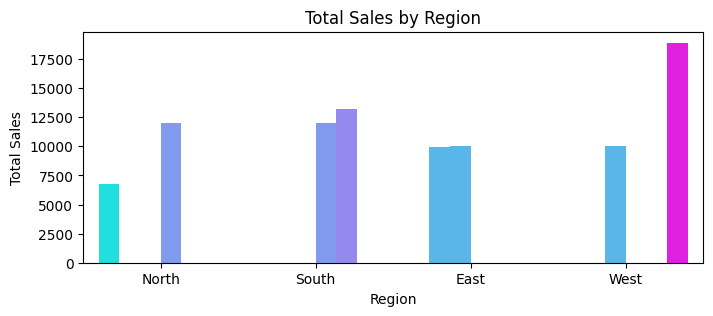

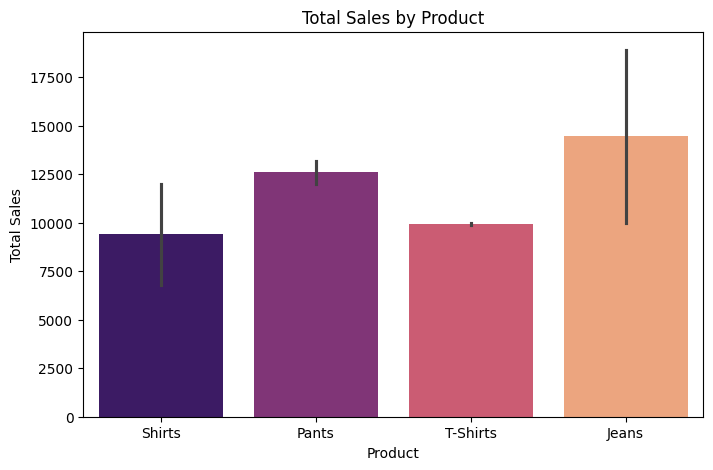

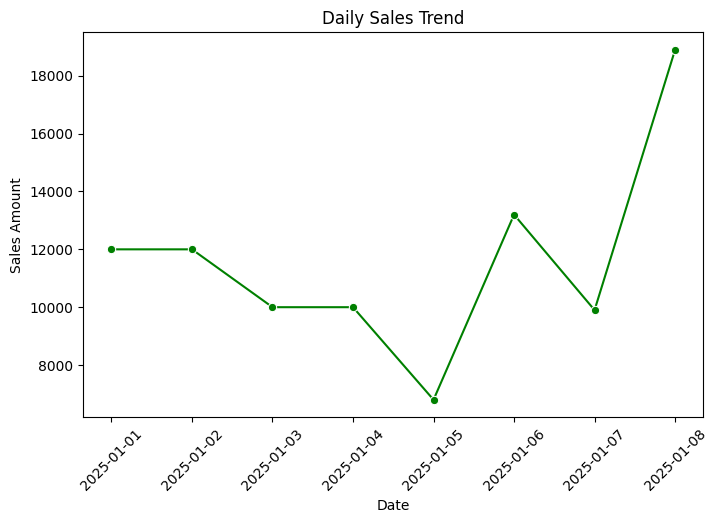

In [ ]:
# 🧩 Step 2: Sales Data Visualization Notebook Version

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. Read data from CSV file
file_path = "/workspaces/sales_analytics_dashboard/SALES_ANALYTICS_DASHBOARD/Data/sales_data.csv"
df = pd.read_csv(file_path)

# ✅ 2. Display first few rows to confirm
df.head()

# ✅ 3. Total Sales by Region
plt.figure(figsize=(8,3))
sns.barplot(x="Region", y="Total", data=df, hue="Region", palette="cool", legend=False)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

# ✅ 4. Total Sales by Product
plt.figure(figsize=(8,5))
sns.barplot(x="Product", y="Total", data=df, hue="Product", palette="magma", legend=False)
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()

# ✅ 5. Daily Sales Trend
plt.figure(figsize=(8,5))
sns.lineplot(x="Date", y="Total", data=df, marker="o", color="green")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_43021/3625768029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x='Region', y='Total', data=region_totals, palette='cool')
/tmp/ipykernel_43021/3625768029.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], x='Region', y='Total', data=df, palette='cool')


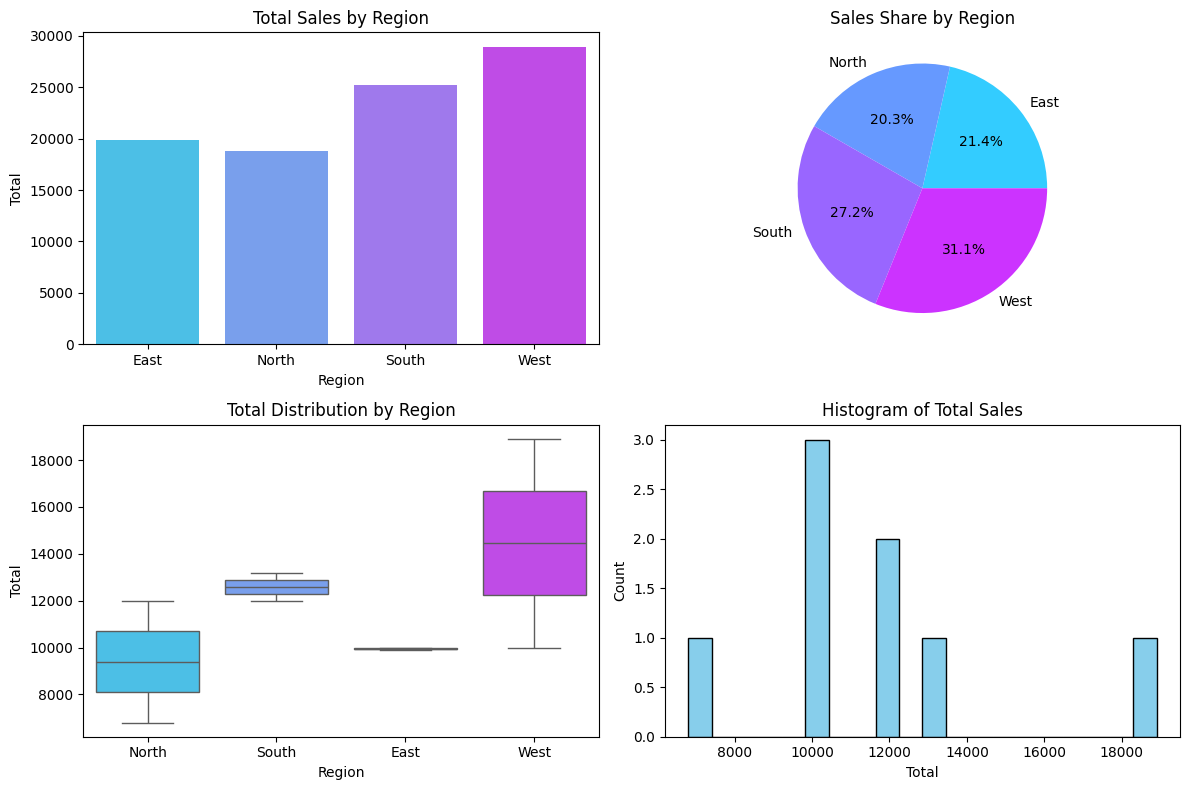

In [3]:
# create and show multiple visuals (re-uses df, sns, plt already imported)
region_totals = df.groupby('Region', as_index=False).agg({'Total': 'sum'})


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# barplot: total by region
sns.barplot(ax=axes[0, 0], x='Region', y='Total', data=region_totals, palette='cool')
axes[0, 0].set_title('Total Sales by Region')

# pie chart: share by region
axes[0, 1].pie(region_totals['Total'], labels=region_totals['Region'],
               autopct='%1.1f%%', colors=sns.color_palette('cool', len(region_totals)))
axes[0, 1].set_title('Sales Share by Region')

# boxplot: distribution of Total by region
sns.boxplot(ax=axes[1, 0], x='Region', y='Total', data=df, palette='cool')
axes[1, 0].set_title('Total Distribution by Region')

# histogram: overall Total distribution
axes[1, 1].hist(df['Total'].dropna(), bins=20, color='skyblue', edgecolor='k')
axes[1, 1].set_title('Histogram of Total Sales')
axes[1, 1].set_xlabel('Total')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
# save the combined figure to a file
plt.savefig('sales_visuals_overview.png', dpi=150, bbox_inches='tight')
plt.show()